In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Мера загрязненности листа в классификации

Рассмотрим на пример одно листа без интервального вопроса (вопроса о разделениее)


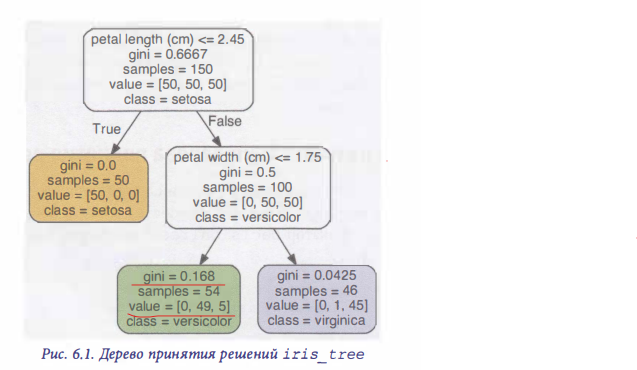


- Коэффициент загрязненности Джинни


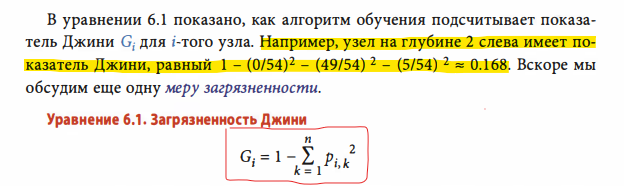


---
---

- Энтропия

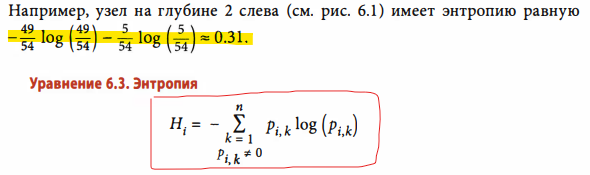




---
---

- При сбалансированных классах выбираем Джинни (по умолчанию)
- При несбалансированных классах - Энтропия (Джинни в этом случае изолирует превалирующий класс)


# Гиперпараметры

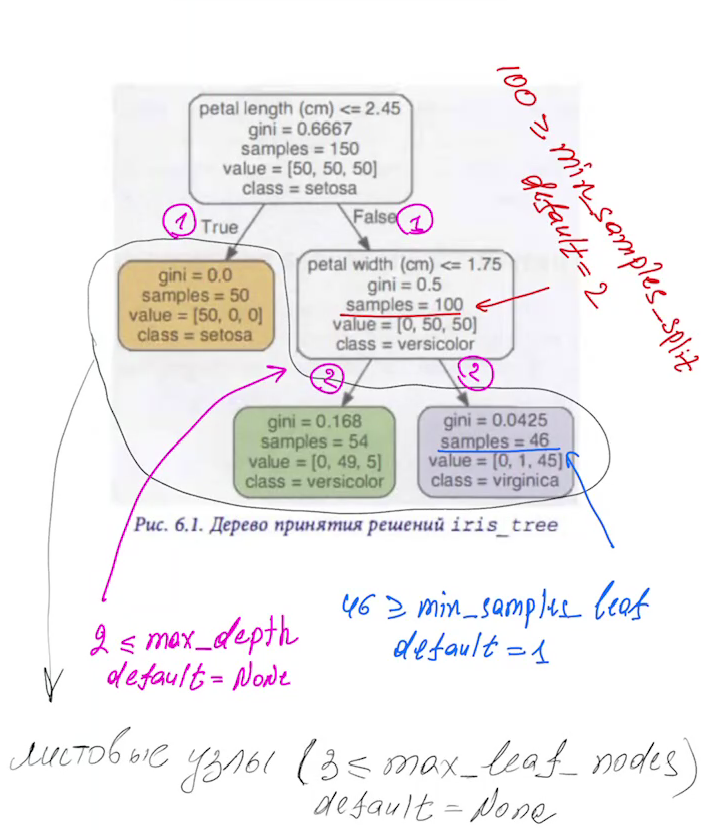


---
---

- max_depth - максимальная глубина дерева. Это максимальное количество уровней или узлов, которые могут быть пройдены от корневого узла до любого листа в дереве решений. (При увеличении этого значению возрастает возможность переобучения)
- min_samples_split - минимальное число образцов, которые должны находится в узле, прежде чем его можно будет расщепить
- min_samples_leaf - минимальное число образцов, которые должны находится в листовом узле (последний лист)
- max_leaf_nodes - максимальное количество листовых узлов (последние листы без расщипления)

# Генерируем набор данных

In [2]:
X, y = make_classification(
    n_samples = 100000,
    n_features = 10,
    n_informative = 8,
    n_classes = 3,
    flip_y = 0.1,
    class_sep = 0.5,
    random_state = 42
)

print(X.shape, y.shape)

(100000, 10) (100000,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

##  Простейшая модель Decision-tree clf

In [4]:
tree_clf = DecisionTreeClassifier()
tree_clf

DecisionTreeClassifier()

In [10]:
grid_params = {
    'criterion': ['gini'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(1,20),
    'min_samples_leaf': np.arange(1, 21, 5)
}

grid_search = GridSearchCV(
    tree_clf,
    grid_params,
    cv = 5,
    scoring = 'accuracy',
    return_train_score = True,
    verbose = 0)



best_model = grid_search.fit(X_train,y_train)
best_model.best_params_

"grid_params = {\n    'criterion': ['gini'],\n    'max_depth': np.arange(1, 20),\n    'min_samples_split': np.arange(1,20),\n    'min_samples_leaf': np.arange(1, 21, 5)\n}\n\ngrid_search = GridSearchCV(\n    tree_clf,\n    grid_params,\n    cv = 5,\n    scoring = 'accuracy',\n    return_train_score = True,\n    verbose = 0)\n\n\n\nbest_model = grid_search.fit(X_train,y_train)\nbest_model.best_params_"

In [32]:
data = pd.read_csv('grid_search_result_with_train.csv')
data.head()

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,mean_train_score
0,1,1,1,NaN,NaN
1,1,1,2,0.410863,0.411684
2,1,1,3,0.410863,0.411684
3,1,1,4,0.410863,0.411684
4,1,1,5,0.410863,0.411684


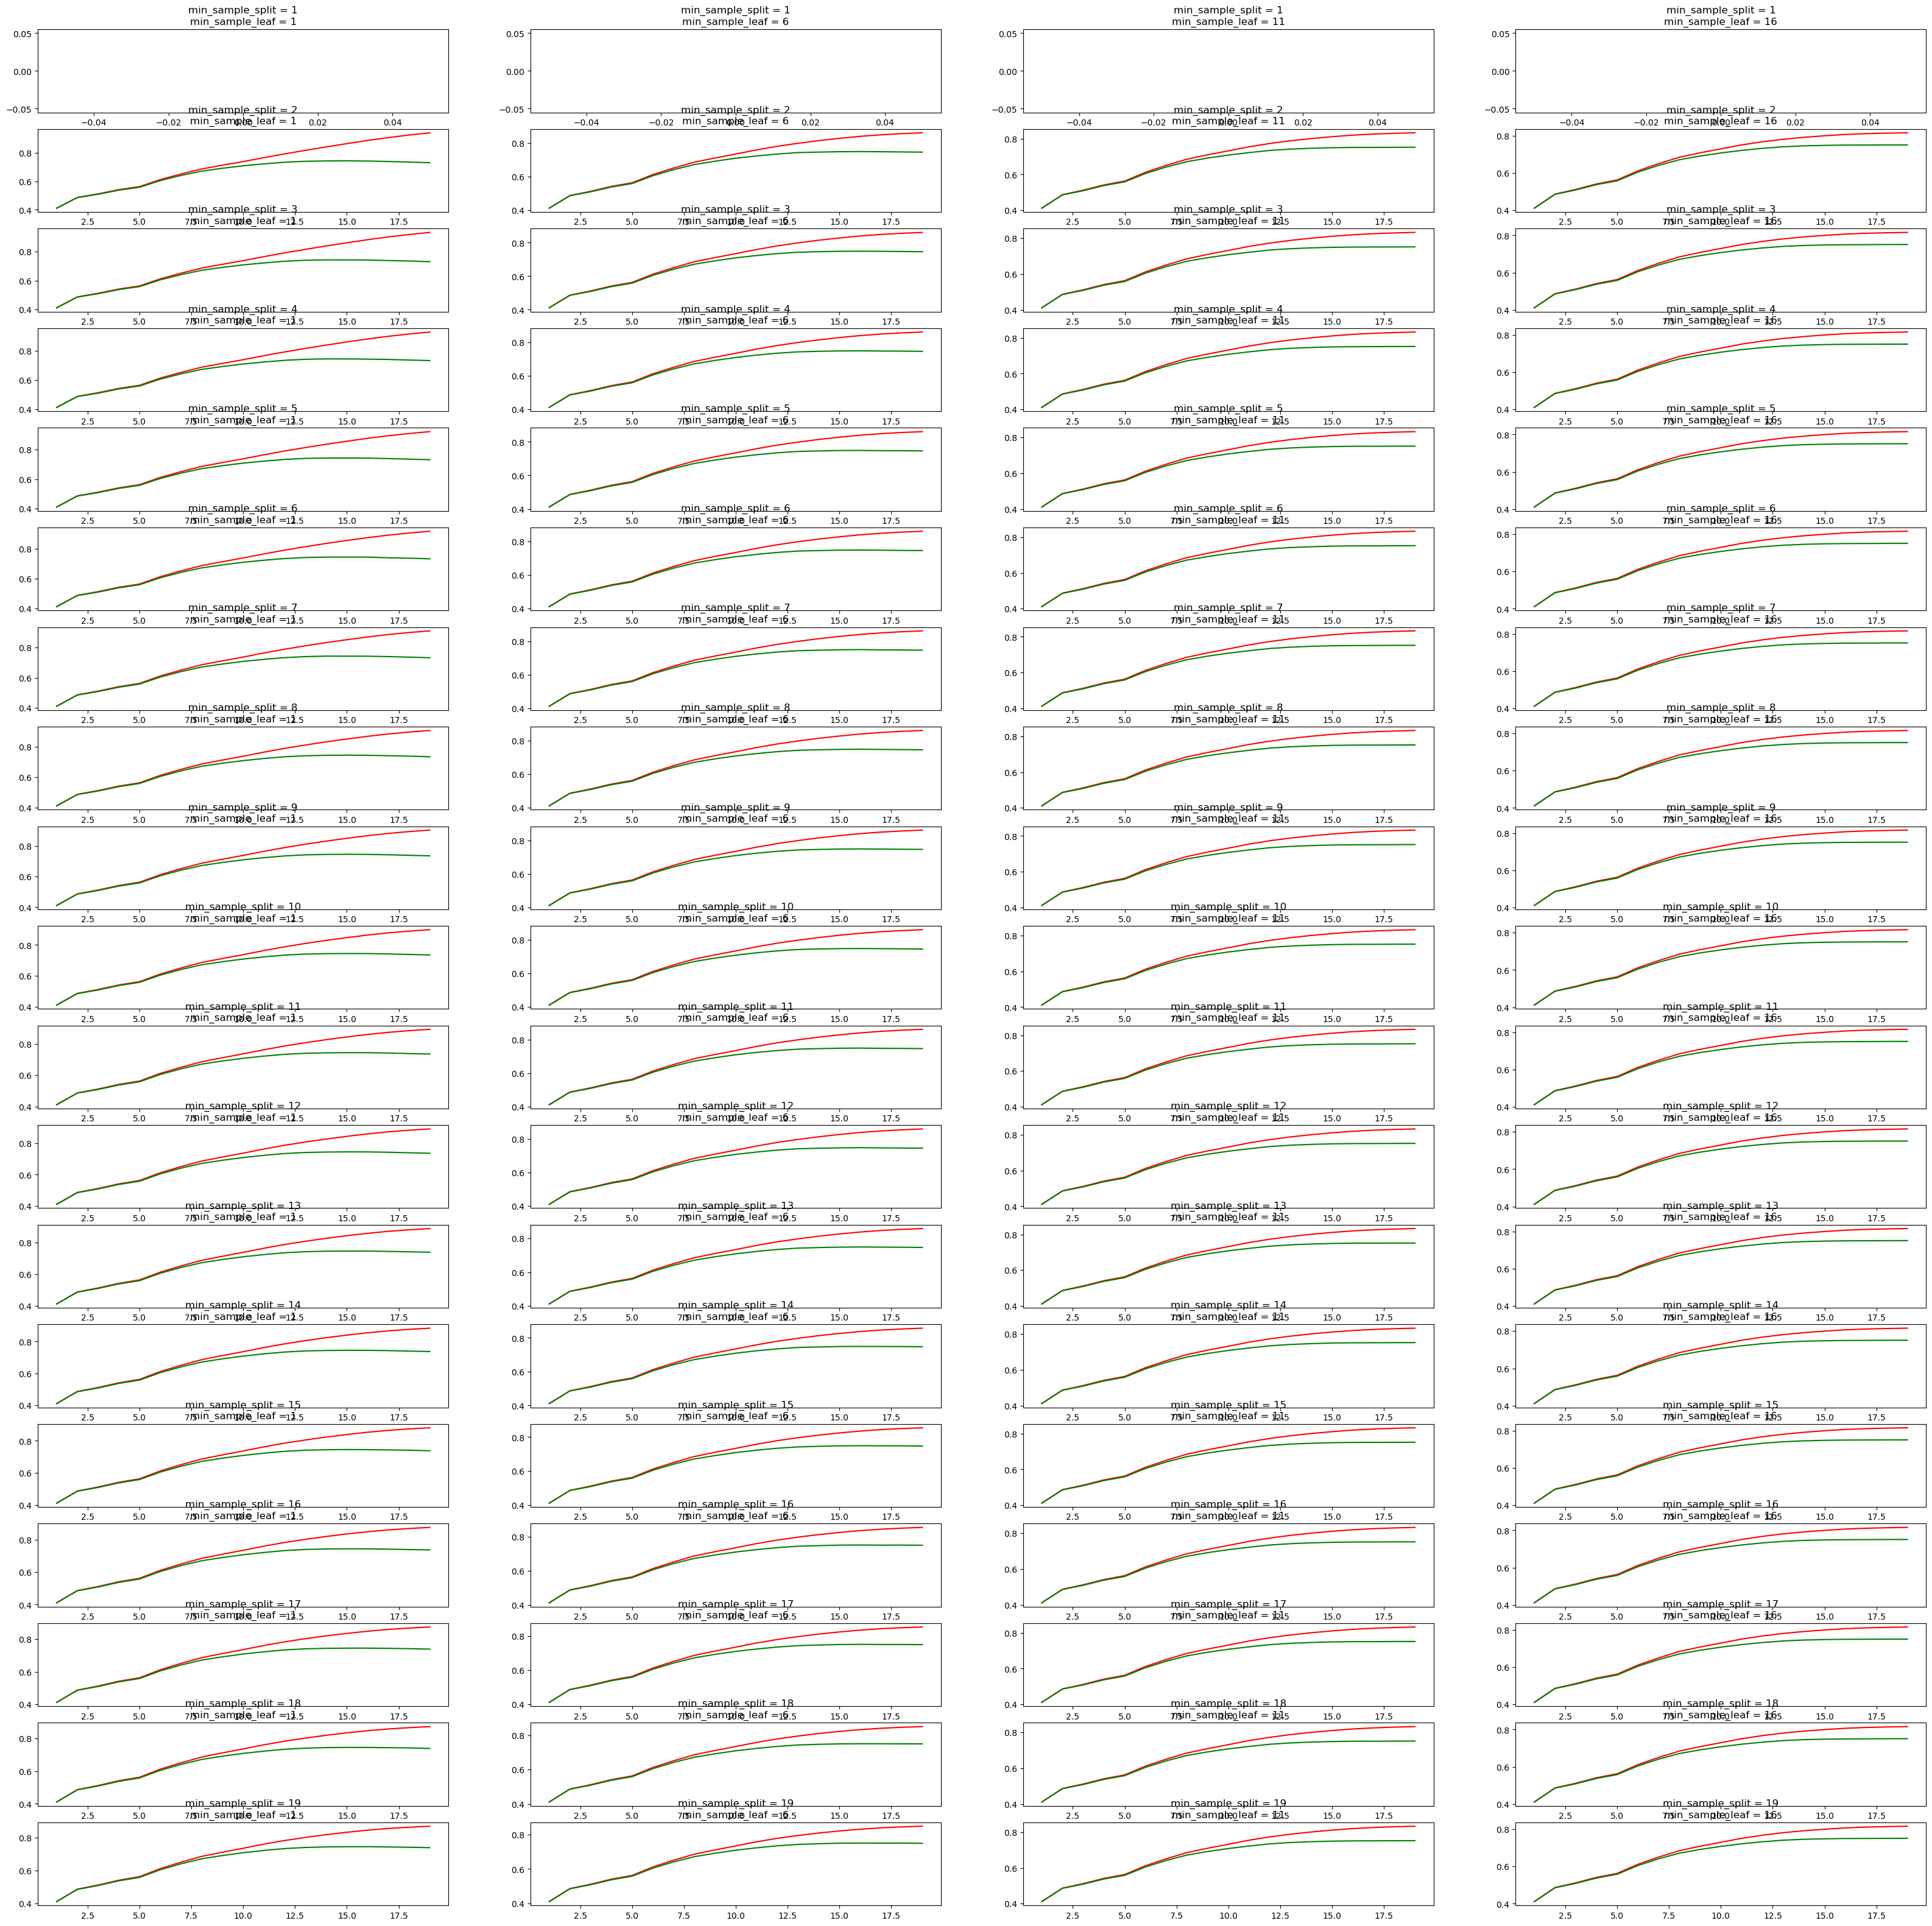

"plt.subplot(2, 2, 1)  # Первый график\nplt.plot(, x**2)\nplt.title('Квадратичная функция')\n\nplt.subplot(2, 2, 2)  # Второй график\nplt.plot(x, x**3)\nplt.title('Кубическая функция')\n\nplt.subplot(2, 2, 3)  # Третий график\nplt.plot(x, np.sin(x))\nplt.title('Синусоидальная функция')\n\nplt.subplot(2, 2, 4)  # Четвертый график\nplt.plot(x, np.cos(x))\nplt.title('Косинусоидальная функция')\n\nplt.show()"

In [31]:
i = len(data['param_min_samples_split'].unique())
j = len(data['param_min_samples_leaf'].unique())

k = 1
plt.figure(figsize = (40,40))
for min_sample_split in data['param_min_samples_split'].unique():
    for min_sample_leaf in data['param_min_samples_leaf'].unique():

        plot_data = data[(data['param_min_samples_split'] == min_sample_split) & (data['param_min_samples_leaf'] == min_sample_leaf)]
        plt.subplot(i, j, k)
        plt.plot(
            plot_data['param_max_depth'].to_numpy(),
            plot_data['mean_train_score'],
            color = 'red'
        )
        plt.plot(
            plot_data['param_max_depth'].to_numpy(),
            plot_data['mean_test_score'],
            color = 'green'
        )
        plt.title('min_sample_split = {}\nmin_sample_leaf = {}'.format(min_sample_split, min_sample_leaf))

        k += 1

plt.show()

# Вывод по классификации


- при увеличении значения гиперпараметра min_samples_split - переобучение МЕДЛЕННО снижается
- при увеличении значения гиперпараметра min_samples_leaf - переобучение СУЩЕСТВЕННО снижается
- выбор гиперпараметра max_depth - GridSearch